In [1]:
import tensorflow as tf
print(tf.__version__)

2.12.0


In [2]:
#load data
mnist = tf.keras.datasets.fashion_mnist

In [3]:
#get training and testing data
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [4]:
training_images.shape

(60000, 28, 28)

In [5]:
training_labels.shape 

(60000,)

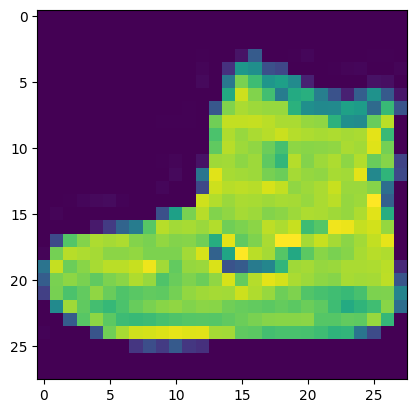

In [6]:
import matplotlib.pyplot as plt
plt.imshow(training_images[0])
#print(training_labels[0])
#print(training_images[0])

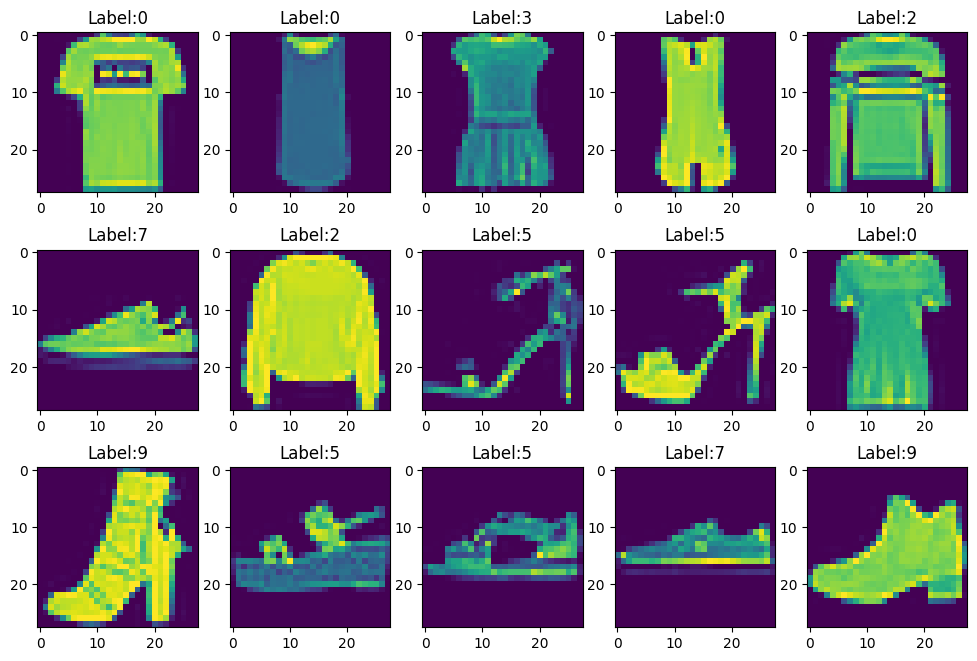

In [7]:
# grid of rows by columns
fig = plt.figure(figsize=(12, 8))
columns = 5
rows = 3
for i in range(1, columns*rows +1):
    img = training_images[i]
    fig.add_subplot(rows, columns, i)
    plt.title("Label:" + str(training_labels[i]))
    plt.imshow(img)
plt.show()

In [8]:
# rescale data to normalize data
training_images  = training_images / 255
test_images = test_images / 255 

In [9]:
# sequential api to build model
model = tf.keras.models.Sequential([
     tf.keras.layers.Flatten(), 
     tf.keras.layers.Dense(128, activation=tf.nn.relu), 
     tf.keras.layers.Dense(10, activation=tf.nn.softmax)
  ]) 

In [10]:
# compile model
model.compile(optimizer = "adam", 
              loss = 'sparse_categorical_crossentropy', # loss: mean_square_error, mean_absolute_error, cross_entropy, binary_cross_entropy
              metrics=['accuracy'])

In [11]:

history = model.fit(training_images, training_labels, epochs=15,
                    validation_data=[test_images, test_labels])

Epoch 1/15
1875/1875 [==============================] - 14s 7ms/step - loss: 0.4995 - accuracy: 0.8242 - val_loss: 0.4297 - val_accuracy: 0.8461
Epoch 2/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3727 - accuracy: 0.8657 - val_loss: 0.3760 - val_accuracy: 0.8645
Epoch 3/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3347 - accuracy: 0.8782 - val_loss: 0.3789 - val_accuracy: 0.8638
Epoch 4/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3122 - accuracy: 0.8854 - val_loss: 0.3557 - val_accuracy: 0.8746
Epoch 5/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2951 - accuracy: 0.8918 - val_loss: 0.3526 - val_accuracy: 0.8696
Epoch 6/15
1875/1875 [==============================] - 8s 5ms/step - loss: 0.2782 - accuracy: 0.8973 - val_loss: 0.3440 - val_accuracy: 0.8759
Epoch 7/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2667 - accuracy: 0.9006 - val_loss: 0.3466 - val_accuracy

In [12]:

def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])

(0.0, 0.5141355775296688)

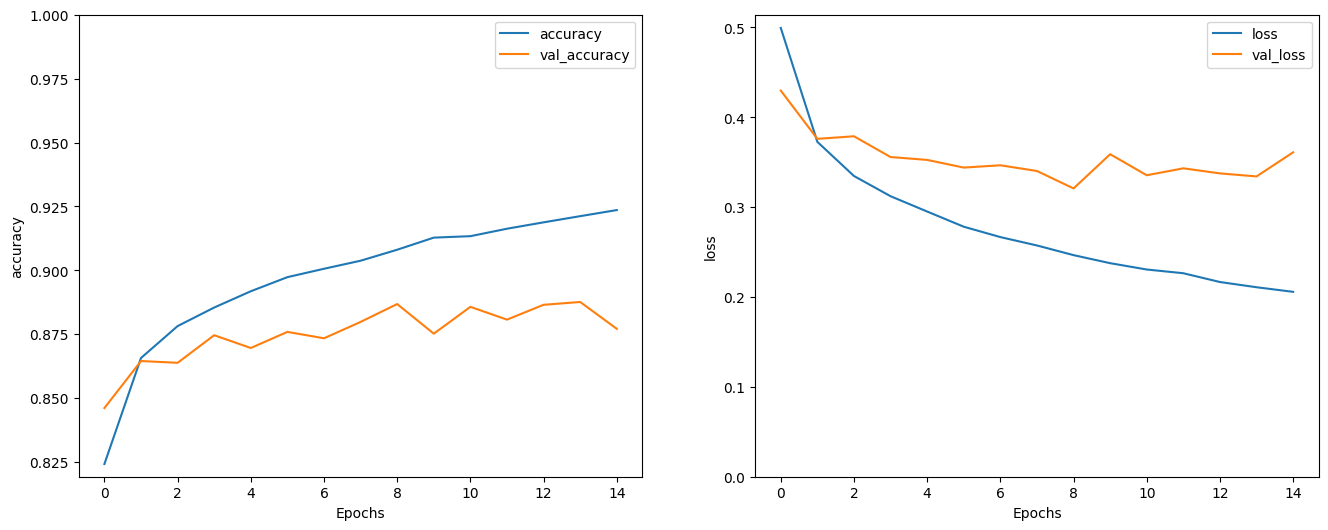

In [13]:
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plot_graphs(history, 'accuracy')
plt.ylim(None, 1)
plt.subplot(1, 2, 2)
plot_graphs(history, 'loss')
plt.ylim(0, None)

In [14]:
# evaluate model
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.3610 - accuracy: 0.8771


[0.3610326945781708, 0.8770999908447266]